# Exploratory Data Analysis

## Import packages

In [164]:
import string
import collections
import json
import numpy
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [234]:
with open('../../wav2info_pilot_data/audioMNIST_meta.txt') as txt_f:  # this txt has json format
    metadata = json.load(txt_f)

## Show an example

In [166]:
list(metadata.values())[0]

{'accent': 'german',
 'age': 30,
 'gender': 'male',
 'native speaker': 'no',
 'origin': 'Europe, Germany, Wuerzburg',
 'recordingdate': '17-06-22-11-04-28',
 'recordingroom': 'Kino'}

## Visualization

In [228]:
def get_values_of_attr(attr_name):
    
    values = [str(example[attr_name]) for example in metadata.values()]
    
    if values[0][0] in string.ascii_letters:  # values[0][0]: the first char of the first string
        values = [i.lower() for i in values]
    else:  # first char not ascii -> integer
        values = [int(i) for i in values]
    
    return values

In [231]:
def get_histogram(attr_name, ax):
    
    values = get_values_of_attr(attr_name)
    heights = collections.Counter(values)
    if type(list(heights.keys())[0]) == int:
        heights = collections.OrderedDict(sorted(heights.items()))
    
    bins = range(len(heights.keys()))
    ax.barh(bins, list(heights.values())) #align='center')  # l: bar positions, x.values(): bar height
    
    ax.set_yticks(bins)
    ax.set_yticklabels(heights.keys())
    ax.set_xlabel('counts'); ax.set_title(attr_name)

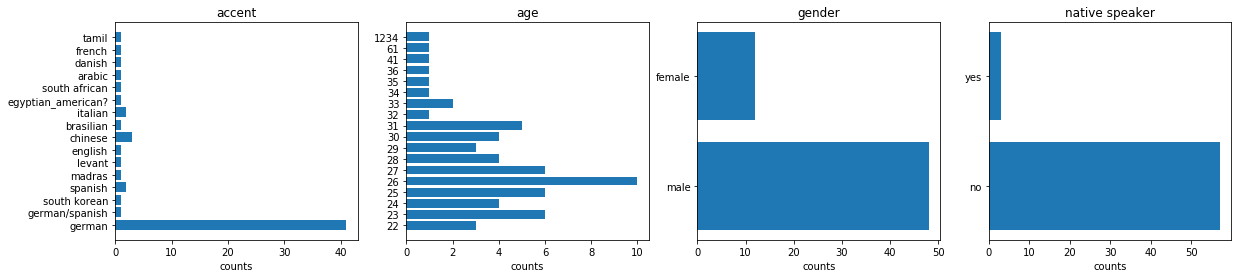

In [232]:
fig = plt.figure(figsize=(20, 4))

fig.add_subplot(141)
get_histogram('accent', ax=plt.gca())

fig.add_subplot(142)
get_histogram('age', ax=plt.gca())

fig.add_subplot(143)
get_histogram('gender', ax=plt.gca())

fig.add_subplot(144)
get_histogram('native speaker', ax=plt.gca())